# Day 08 In-Class Assignment: The QR Algorithm¶
### <p style="text-align: right;"> &#9989; Cesarine Graham.</p>

#### <p style="text-align: right;"> &#9989; Michael Quintieri, Evan Crandall, Allison Perez-Bermudez (Group 4)</p>

## Goals of this assignment

The primary goal of this assignment is to learn about the QR algorithm¶

* Learn how to write QR decomposition function
* Apply QR algorithm to solve eigenvalue and eigenvectors
* Visualize QR-algorithm transformation to matrix

## Assignment instructions

Work with your group to complete this assignment. Upload the assignment to Gradescope at the end of class.
**Make sure everyone's name is listed in everyone's notebook before moving on**

---
## Part 1: The QR Algorithm and QR Decomposition

In this exercise you'll write a program to calculate the eigenvalues and eigenvectors of a real symmetric matrix using the QR algorithm.  Please review the in-class material to see how the QR algorithm works.

The first challenge is to write a program that finds the QR decomposition of a matrix.
Then, we'll use that decomposition to find the eigenvalues.

The QR decomposition expresses a real square  matrix $\mathbf{A}$ in the form $\mathbf{A}=\mathbf{Q}\mathbf{R}$, where $\mathbf{Q}$ is an orthogonal matrix and $\mathbf{R}$ is an upper-triangular matrix.  (Yes, last wee, we called the upper-triangular , $\mathbf{U}$. But the name is a tradition that everyone uses. So we will use $\mathbf{R}$ here too.)
Given an $N\times N$ matrix $\mathbf{A}$ we can compute the QR decomposition as follows.

Let us think of the matrix as a set of $N$ column vectors $\vec{a}_0\ldots\vec{a}_{N-1}$
thus:


$$
\mathbf{A} = \begin{bmatrix}
            | & | & | & \cdots \\
            \vec{a}_0 & \vec{a}_1 & \vec{a}_2 & \cdots \\
            | & | & | & \cdots
          \end{bmatrix},
$$

where we have numbered the vectors in Python fashion, starting from zero, which will be convenient when writing the program.  
We now define two new sets of vectors $\vec{u}_0,\ldots,\vec{u}_{N-1}$ and $\vec{q}_0,\ldots,\vec{q}_{N-1}$ as follows:

$$
\begin{align}
\vec{u}_0 &= \vec{a}_0,
  & \vec{q}_0 = {\vec{u}_0\over\left|\vec{u}_0\right|}\,,\qquad \\
\vec{u}_1 &= \vec{a}_1 - \left(\vec{q}_0\cdot\vec{a}_1\right) \vec{q}_0,
  & \vec{q}_1 = {\vec{u}_1\over\left|\vec{u}_1\right|}\,, \qquad \\
\vec{u}_2 &= \vec{a}_2 - \left(\vec{q}_0\cdot\vec{a}_2\right) \vec{q}_0
             - \left(\vec{q}_1\cdot\vec{a}_2\right) \vec{q}_1,
  & \vec{q}_2 = {\vec{u}_2\over\left|\vec{u}_2\right|}\,, \qquad
\end{align}
$$

and so forth.
The general formulas for calculating the $\vec{u}_i$ and $\vec{q}_i$ are

$$
\vec{u}_i = \vec{a}_i - \sum_{j=0}^{i-1} \left(\vec{q}_j\cdot\vec{a}_i\right)
            \vec{q}_j, \qquad
\vec{q}_i = {\vec{u}_i\over\left|\vec{u}_i\right|}.
$$


### Task 1.1
Show, by induction or otherwise, that the vectors $\vec{q}_i$ are orthonormal, i.e., that they satisfy

$$
\vec{q}_i\cdot\vec{q}_j = \biggl\lbrace\begin{array}{ll}
                            1 & \quad\mbox{if $i=j$,} \\
                            0 & \quad\mbox{if $i\ne j$.}
                          \end{array}
$$


<font color='blue'>
    
**Proof:** We proceed by induction.   
    
**Base Case:** For $i = 1$, we have $\vec{q}_0 = \hat{1}$, which is a unit vector (normalized to unity) by definition. Therefore, the base case holds.
    
**Inductive Hypothesis:** Assume that for some arbitrary $k \geq 1$, the vectors $\vec{q}_0, \vec{q}_1, \ldots, \vec{q}_k$ are orthonormal, i.e., they are mutually orthogonal, and each vector has a magnitude of 1:

$$
\begin{align*}
\vec{q}_i \cdot \vec{q}_j &= 0, \quad \text{for } i \neq j, \quad \text{where } 0 \leq i, j \leq k \\
\vec{q}_i \cdot \vec{q}_i &= 1, \quad \text{for } 0 \leq i \leq k
\end{align*}
$$

This assumption is made in order to establish the inductive step, where the goal is to prove that the statement holds for $k+1$ using the assumption that it holds for $k$.

**Inductive Step:** Now, we want to show that the vectors $\vec{q}_0, \vec{q}_1, \ldots, \vec{q}_{k+1}$ are also orthonormal.

Consider the vector $\vec{q}_{k+1}$ using the given expression:

$$
\begin{align*}
\vec{q}_{k+1} \cdot \vec{q}_k &= {1 \over \left|\vec{u}_{k+1}\right|}\left[\vec{a}_{k+1}\cdot \vec{q}_k - \vec{q}_k \cdot \vec{a}_{k+1} \right]
\end{align*}
$$

As $\vec{q}_0, \vec{q}_1, \ldots, \vec{q}_k$ are orthonormal, the terms in the sum for $j \leq k$ will be zero ($\vec{q}_j \cdot \vec{q}_k = 0$), leaving only the term with $j = k$:

$$
\begin{align*}
\vec{q}_{k+1} \cdot \vec{q}_k &= {1 \over \left|\vec{u}_{k+1}\right|}\left[\vec{a}_{k+1}\cdot \vec{q}_k - \left(\vec{q}_k \cdot \vec{a}_{k+1}\right)\vec{q}_k \cdot \vec{q}_k \right] \\
&= {1 \over \left|\vec{u}_{k+1}\right|}\left[\vec{a}_{k+1}\cdot \vec{q}_k - \vec{q}_k \cdot \vec{a}_{k+1} \right]
\end{align*}
$$

This expression is identical to the one for $\vec{q}_{k+1} \cdot \vec{q}_k$ derived in the original argument. Therefore, we can conclude that $\vec{q}_{k+1} \cdot \vec{q}_k = 0$.

Next, consider $\vec{q}_{k+1} \cdot \vec{q}_{k+1}$:

$$
\begin{align*}
\vec{q}_{k+1} \cdot \vec{q}_{k+1} &= {\vec{u}_{k+1}\over\left|\vec{u}_{k+1}\right|} \cdot {\vec{u}_{k+1}\over\left|\vec{u}_{k+1}\right|} \\
&= 1
\end{align*}
$$

This shows that $\vec{q}_{k+1}$ is also normalized to unity.

Therefore, by induction, if the first $k$ vectors are orthonormal, then the first $k+1$ vectors are also orthonormal. 

### Answer
Assume the vector $\vec{q}_k$ is orthogonal to all $\vec{q}_j$ for all $j < i$ except $j=k$ and that $\vec{q}_k\cdot \vec{q}_k = 1$.
Then, the vector $\vec{q}_i$ is also orthogonal to $\vec{q}_k$, because

$$\begin{align}
\vec{q}_i \cdot \vec{q}_k &=  {\vec{u}_i\over\left|\vec{u}_i\right|} \cdot \vec{q}_k \\
  &= {1 \over\left|\vec{u}_i\right|}\left[\vec{a}_i -\sum_{j=0}^{i-1}\left(\vec{q}_j \cdot \vec{a}_i\right)\vec{q}_j\right] \cdot \vec{q}_k \\
  &= {1 \over\left|\vec{u}_i\right|}\left[\vec{a}_i\cdot \vec{q}_k  -\sum_{j=0}^{i-1}\left(\vec{q}_j \cdot \vec{a}_i\right)\vec{q}_j \cdot \vec{q}_k\right]
\end{align}$$

Almost all terms in the sum over $j$ are zero because $\vec{q}_j \cdot \vec{q}_k = 0$ due to their orthogonality.
The remaining term is

$$\begin{align}
\vec{q}_i \cdot \vec{q}_k &= {1 \over\left|\vec{u}_i\right|}\left[\vec{a}_i\cdot \vec{q}_k - \left(\vec{q}_k \cdot \vec{a}_i\right)\vec{q}_k \cdot \vec{q}_k \right] \\
 &= {1 \over\left|\vec{u}_i\right|}\left[\vec{a}_i\cdot \vec{q}_k - \vec{q}_k \cdot \vec{a}_i \right]
\end{align}$$

and hence, $\vec{q}_i \cdot \vec{q}_k = 0$.

The vector $ \vec{q}_i$ is also normalized to unity:

$$ \vec{q}_i  \cdot \vec{q}_i = {\vec{u}_i\over\left|\vec{u}_i\right|} \cdot {\vec{u}_i\over\left|\vec{u}_i\right|} =1$$

Thus, if the first $i-1$ vectors are orthonormal, so are the first $i$ vectors.
Noting that $\vec{q}_0=\hat{1}$, we can now apply induction with $ \vec{q}_0$ as the base case to prove that all the vectors $\vec{q}_i$ are orthonormal.



### Task 1.2
Rearranging the definitions of the vectors, we have

$$
\begin{align}
\vec{a}_0 &= \left|\vec{u}_0\right|\,\vec{q}_0, \\
\vec{a}_1 &= \left|\vec{u}_1\right|\,\vec{q}_1 + \left(\vec{q}_0\cdot\vec{a}_1\right) \vec{q}_0, \\
\vec{a}_2 &= \left|\vec{u}_2\right|\,\vec{q}_2 + \left(\vec{q}_0\cdot\vec{a}_2\right) \vec{q}_0
              + \left(\vec{q}_1\cdot\vec{a}_2\right) \vec{q}_1,
\end{align}
$$

and so on.  

We can group the vectors $\vec{q}_i$ together as the columns of a matrix and write all of these equations as a single matrix equation

$$
\mathbf{A} = \begin{bmatrix}
            | & | & | & \cdots \\
            \vec{a}_0 & \vec{a}_1 & \vec{a}_2 & \cdots \\
            | & | & | & \cdots
          \end{bmatrix}
 =
\begin{bmatrix}
  | & | & | & \cdots \\
  \vec{q}_0 & \vec{q}_1 & \vec{q}_2 & \cdots \\
  | & | & | & \cdots
\end{bmatrix}
\cdot
\begin{bmatrix}
\left|\vec{u}_0\right| & \vec{q}_0\cdot\vec{a}_1 & \vec{q}_0\cdot\vec{a}_2 & \cdots \\
0           & \left|\vec{u}_1\right| & \vec{q}_1\cdot\vec{a}_2 & \cdots \\
0           & 0           & \left|\vec{u}_2\right| & \cdots
\end{bmatrix}.
$$

(If this looks complicated it's worth multiplying out the matrices on the right to verify for yourself that you get the correct expressions for the $\vec{a}_i$.)

Notice now that the first matrix on the right-hand side of this equation, the matrix with columns $\vec{q}_i$, is orthogonal, because the vectors $\vec{q}_i$ are orthonormal, and the second matrix is upper triangular.
In other words, we have found the QR decomposition $\mathbf{A}=\mathbf{Q}\mathbf{R}$.  
The matrices $\mathbf{Q}$ and $\mathbf{R}$ are

$$
\mathbf{Q} =
\begin{bmatrix}
  | & | & | & \cdots \\
  \vec{q}_0 & \vec{q}_1 & \vec{q}_2 & \cdots \\
  | & | & | & \cdots
\end{bmatrix}
,\qquad
$$

$$
\mathbf{R} =
\begin{bmatrix}
\left|\vec{u}_0\right| & \vec{q}_0\cdot\vec{a}_1 & \vec{q}_0\cdot\vec{a}_2 & \cdots \\
0           & \left|\vec{u}_1\right| & \vec{q}_1\cdot\vec{a}_2 & \cdots \\
0           & 0           & \left|\vec{u}_2\right| & \cdots
\end{bmatrix}.
$$

Write a Python function `qr_decomposition(A)` that takes as its argument a real square matrix $\mathbf{A}$ and returns the two matrices $\mathbf{Q}$ and $\mathbf{R}$  that form its QR decomposition.

In [4]:
# your code here
import numpy as np

def qr_decomposition(A):
    A = A.astype(float)  # Convert matrix elements to float
    m, n = A.shape
    Q = np.identity(m)
    R = np.zeros((m, n))
    
    for i in range(n):
        a_i = A[:, i].copy()
        for j in range(i):
            q_j = Q[:, j]
            R[j, i] = np.dot(q_j, a_i)
            a_i -= R[j, i] * q_j
        norm_u_i = np.linalg.norm(a_i)
        Q[:, i] = a_i / norm_u_i
        R[i, i] = norm_u_i
    return Q, R

A = np.array([[12, -51, 4], [6, 167, -68], [-4, 24, -41]])
Q, R = qr_decomposition(A)

print("Matrix Q:", '\n', Q)
print("\nMatrix R:", '\n', R)
print("\n", (Q@R))

Matrix Q: 
 [[ 0.85714286 -0.39428571 -0.33142857]
 [ 0.42857143  0.90285714  0.03428571]
 [-0.28571429  0.17142857 -0.94285714]]

Matrix R: 
 [[ 14.  21. -14.]
 [  0. 175. -70.]
 [  0.   0.  35.]]

 [[ 12. -51.   4.]
 [  6. 167. -68.]
 [ -4.  24. -41.]]



### Task 1.3

#### 1.3.1
Use the inputs from the pre-class $3 \times 3$ example you worked on, and compare the results when using your new function



In [5]:
#1.3.1 your code here

A = np.array([[12, -51, 4], [6, 167, -68], [-4, 24, -41]])
Q, R = qr_decomposition(A)

print("Matrix Q:", '\n', Q)
print("\nMatrix R:", '\n', R)
print("\n", (Q@R))

Matrix Q: 
 [[ 0.85714286 -0.39428571 -0.33142857]
 [ 0.42857143  0.90285714  0.03428571]
 [-0.28571429  0.17142857 -0.94285714]]

Matrix R: 
 [[ 14.  21. -14.]
 [  0. 175. -70.]
 [  0.   0.  35.]]

 [[ 12. -51.   4.]
 [  6. 167. -68.]
 [ -4.  24. -41.]]



#### 1.3.2
Now, test your function on this example matrix

$$
\mathbf{A} = \begin{bmatrix}
            1 & 4 & 8 & 4 \\
            4 & 2 & 3 & 7 \\
            8 & 3 & 6 & 9 \\
            4 & 7 & 9 & 2
          \end{bmatrix}.
$$

Check your results by multiplying $\mathbf{Q}$ and $\mathbf{R}$ together to recover the original matrix $\mathbf{A}$.

In [6]:
#1.3.2 your code here

A = np.array([[1, 4, 8, 4], [4, 2, 3, 7], [8, 3, 6, 9], [4, 7, 9, 2]])
Q, R = qr_decomposition(A)

print("Matrix Q:", '\n', Q)
print("\nMatrix R:", '\n', R)
print("\n", (Q@R))

Matrix Q: 
 [[ 0.10153462  0.558463    0.80981107  0.1483773 ]
 [ 0.40613847 -0.10686638 -0.14147555  0.8964462 ]
 [ 0.81227693 -0.38092692  0.22995024 -0.37712564]
 [ 0.40613847  0.72910447 -0.5208777  -0.17928924]]

Matrix R: 
 [[ 9.8488578   6.49821546 10.55960012 11.37187705]
 [ 0.          5.98106979  8.4234836  -0.484346  ]
 [ 0.          0.          2.74586406  3.27671222]
 [ 0.          0.          0.          3.11592335]]

 [[1. 4. 8. 4.]
 [4. 2. 3. 7.]
 [8. 3. 6. 9.]
 [4. 7. 9. 2.]]



### Task 1.4 Find the Eigenvalues
Write a complete program to calculate the eigenvalues and eigenvectors of a real symmetric matrix (using the $\mathbf{A}$ in 1.3.2) using the QR algorithm.  

Continue the calculation until the magnitude of every off-diagonal element of the matrix is smaller than $10^{-6}$.
Test your program on the example matrix above.  

You should find that the eigenvalues are $1$, $21$, $-3$, and $-8$.

In [10]:
# your code here

A = np.array([[1, 4, 8, 4], [4, 2, 3, 7], [8, 3, 6, 9], [4, 7, 9, 2]])
A.astype("float")
Q, R = qr_decomposition(A)
V = Q
for n in range(10000):
    Q, R = qr_decomposition(A)
    A = R@Q
    Q, R = qr_decomposition(A)
    V = Q@V
D = A
print(V)
print(A)

[[ 0.40034037  0.41449437  0.73740471  0.35235821]
 [ 0.42242085 -0.42813294 -0.33520311  0.72519079]
 [ 0.812223    0.05758563 -0.215831   -0.53888281]
 [-0.03977456  0.8009872  -0.54524321  0.24402323]]
[[ 2.10000000e+01  6.25660615e-15  1.36287450e-14 -2.52201399e-14]
 [ 0.00000000e+00 -8.00000000e+00 -6.39107559e-16  5.95219119e-15]
 [ 0.00000000e+00  0.00000000e+00 -3.00000000e+00  5.09191951e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


### Task 1.5 (If time allows) Visualizing the  $\mathbf{A}_k$ Matrices

Create a real symmetrized $N \times N$ matrix generated using a random number generator (see example code below), $\mathbf{A}$, with $N=20$.
Apply the QR algorithm and update the $\mathbf{A}_k$ matrix plot each step.
Observe how the matrix changes.

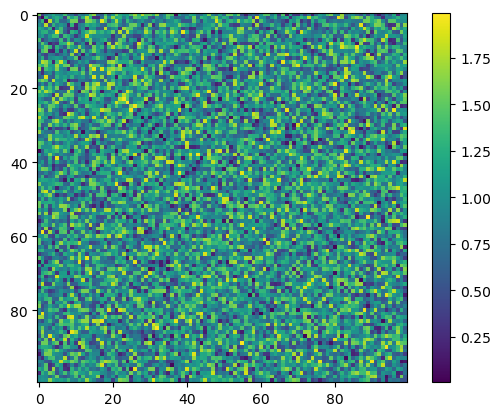

In [9]:
# example code to generate a  real symmetrized  $N \times N$ matrix and visulize it

import matplotlib.pyplot as plt
import numpy as np
N=100
tmp=np.random.random((N,N))
A= tmp + tmp.T

plt.imshow(A)
plt.colorbar()
plt.show()

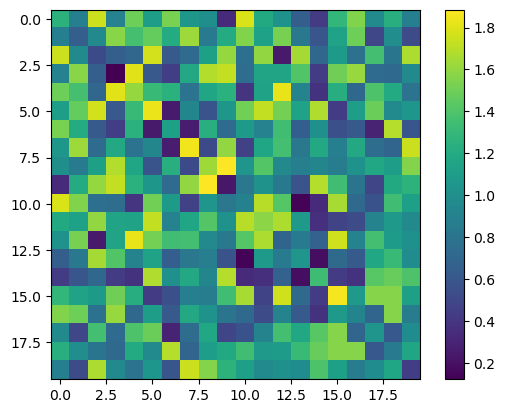

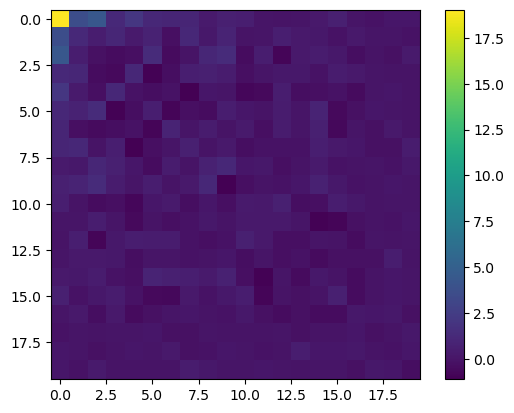

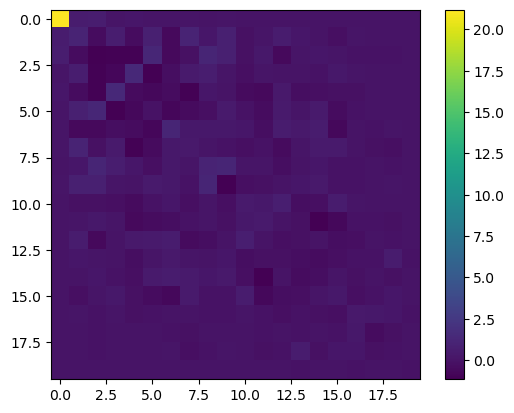

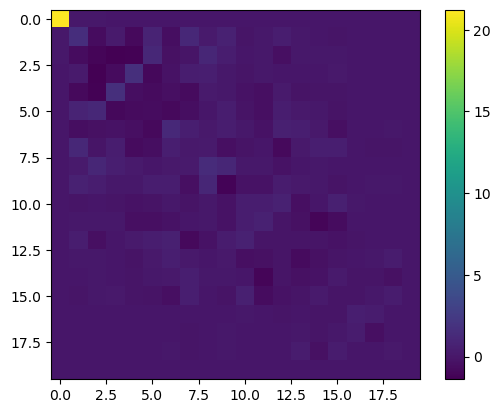

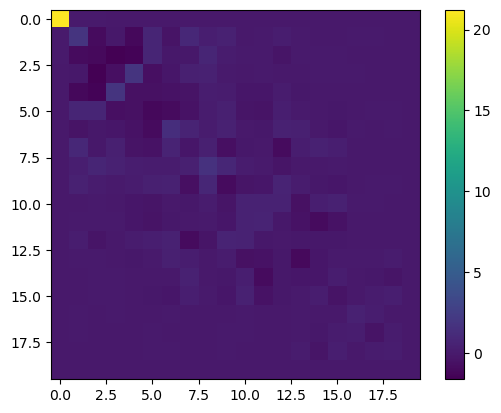

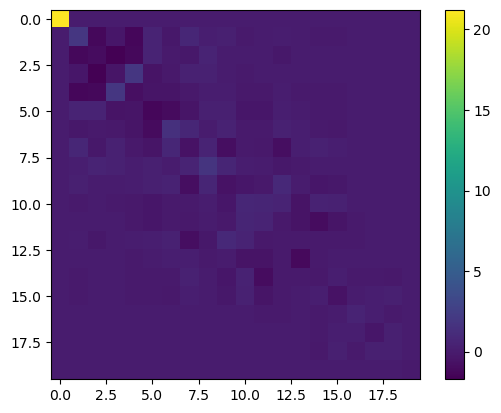

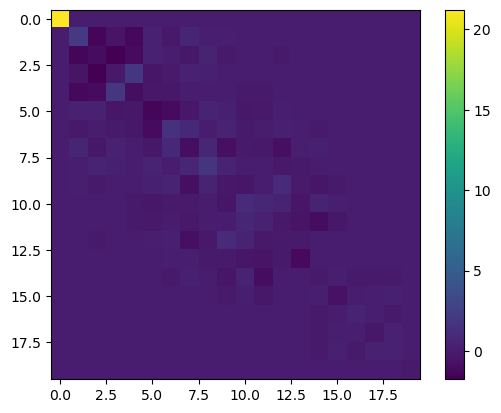

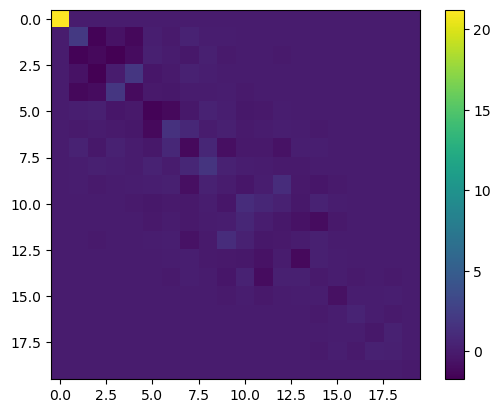

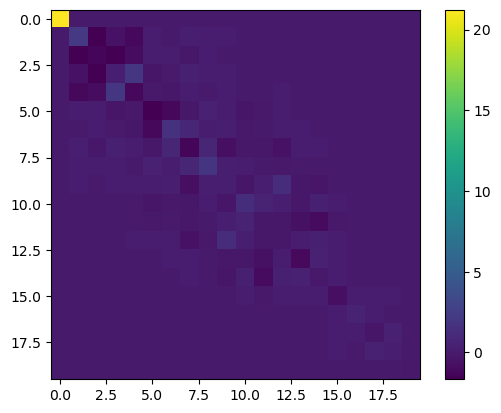

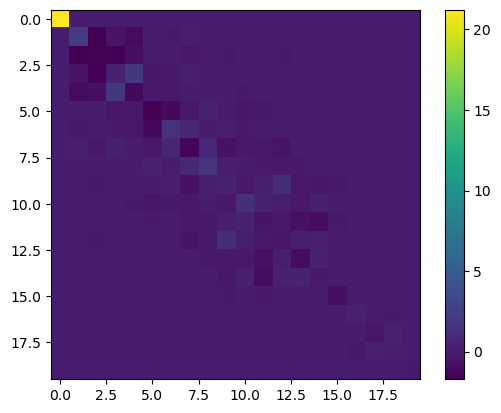

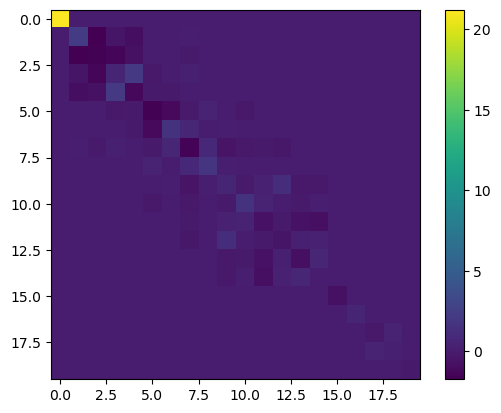

In [11]:
# your code here

#from in class example
import matplotlib.pyplot as plt
import numpy as np
N=20
tmp=np.random.random((N,N))
A= tmp + tmp.T
Q, R = qr_decomposition(A)
plt.imshow(A)
plt.colorbar()
plt.show()
for i in range(10):
    A = np.dot(R,Q)
    Q,R = qr_decomposition(A)
    plt.imshow(A)
    plt.colorbar()
    plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


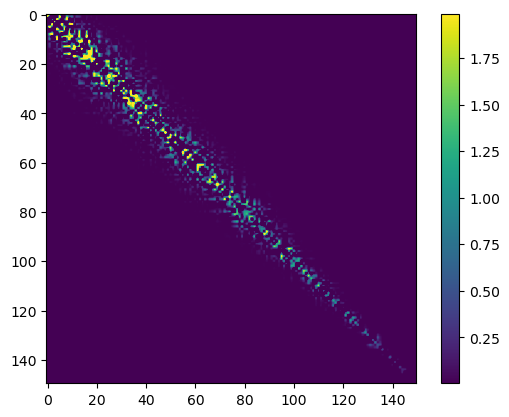

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

def qr_decomposition(A):
    Q, R = np.linalg.qr(A)
    return Q, R

# Number of frames (including the initial plot)
num_frames = 25

# Create a figure and axis for the animation
fig, ax = plt.subplots()

# Initialize the first plot
N = 150
tmp = np.random.random((N, N))
A = tmp + tmp.T
Q, R = qr_decomposition(A)
img = ax.imshow(A, animated=True)
plt.colorbar(img)

# Animation update function
def update(frame):
    global A, Q, R
    A = np.dot(R, Q)
    Q, R = qr_decomposition(A)
    img.set_array(A)
    return img,

# Create the animation
ani = FuncAnimation(fig, update, frames=num_frames, interval=500, blit=True)

# Save the animation as a GIF
ani.save('qr_animation.gif', writer='imagemagick', fps=4)

# Show the animation (optional)
plt.show()
